# Prediction of Customers Subscription to Bank Services
==========================================

    By : Srivathsan Mohan
***

***Importing the necessary packages***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import os
%matplotlib inline 

***Reading the Dataset by using Delimiter***

In [2]:
Direct_marketing_data = pd.read_csv('Direct_Marketing.csv', header=0, sep=";")

***
#### Describing the data:




***Dataset Information using info()***

In [3]:
Direct_marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
class             41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

*From above we can see that the dataset contains 21 attributes and their respective datatypes.*
***


***Number of rows and columns using shape func***

In [4]:
Direct_marketing_data.shape

(41188, 21)

*The dataset contains 41188 rows and 21 columns.*
***

***Printing the top 10 rows of the dataset using head()***

In [5]:
Direct_marketing_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


*From the above table,we can understand that 'class' is the output variable of our dataset while rest are all attributes, it will represent if the customer has subcribed to 'term deposit' or not.*
   > - yes = subscribed
   > - no = did not subscribe
***

*Checking for ***null*** values in the dataset.*

In [6]:
Direct_marketing_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
class             0
dtype: int64

*Above result shows that the columns do not have any null values.* 
***

*Checking for any ***categorical*** data.*

In [7]:
non_numerical=Direct_marketing_data.select_dtypes(include=['object'])
non_numerical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'class'],
      dtype='object')

*From the above output, we can see that there are 11 columns that have categorical data*

***Using LabelEncoder() to convert categorical data to quantitative***

In [8]:
from sklearn.preprocessing import LabelEncoder


lb_make = LabelEncoder()

Direct_marketing_data["job"] = lb_make.fit_transform(Direct_marketing_data["job"])
Direct_marketing_data["marital"] = lb_make.fit_transform(Direct_marketing_data["marital"])
Direct_marketing_data["education"] = lb_make.fit_transform(Direct_marketing_data["education"])
Direct_marketing_data["default"] = lb_make.fit_transform(Direct_marketing_data["default"])
Direct_marketing_data["housing"] = lb_make.fit_transform(Direct_marketing_data["housing"])
Direct_marketing_data["loan"] = lb_make.fit_transform(Direct_marketing_data["loan"])
Direct_marketing_data["contact"] = lb_make.fit_transform(Direct_marketing_data["contact"])
Direct_marketing_data["month"] = lb_make.fit_transform(Direct_marketing_data["month"])
Direct_marketing_data["day_of_week"] = lb_make.fit_transform(Direct_marketing_data["day_of_week"])
Direct_marketing_data["poutcome"] = lb_make.fit_transform(Direct_marketing_data["poutcome"])
Direct_marketing_data["class"] = lb_make.fit_transform(Direct_marketing_data["class"])


***Checking for any categorical data again after implementing above function***

In [9]:
non_numerical=Direct_marketing_data.select_dtypes(include=['object'])
non_numerical.columns

Index([], dtype='object')

*Above result shows that there is no categorical data is present.*
***


***Visualizing the distribution of key input variables of the dataset***

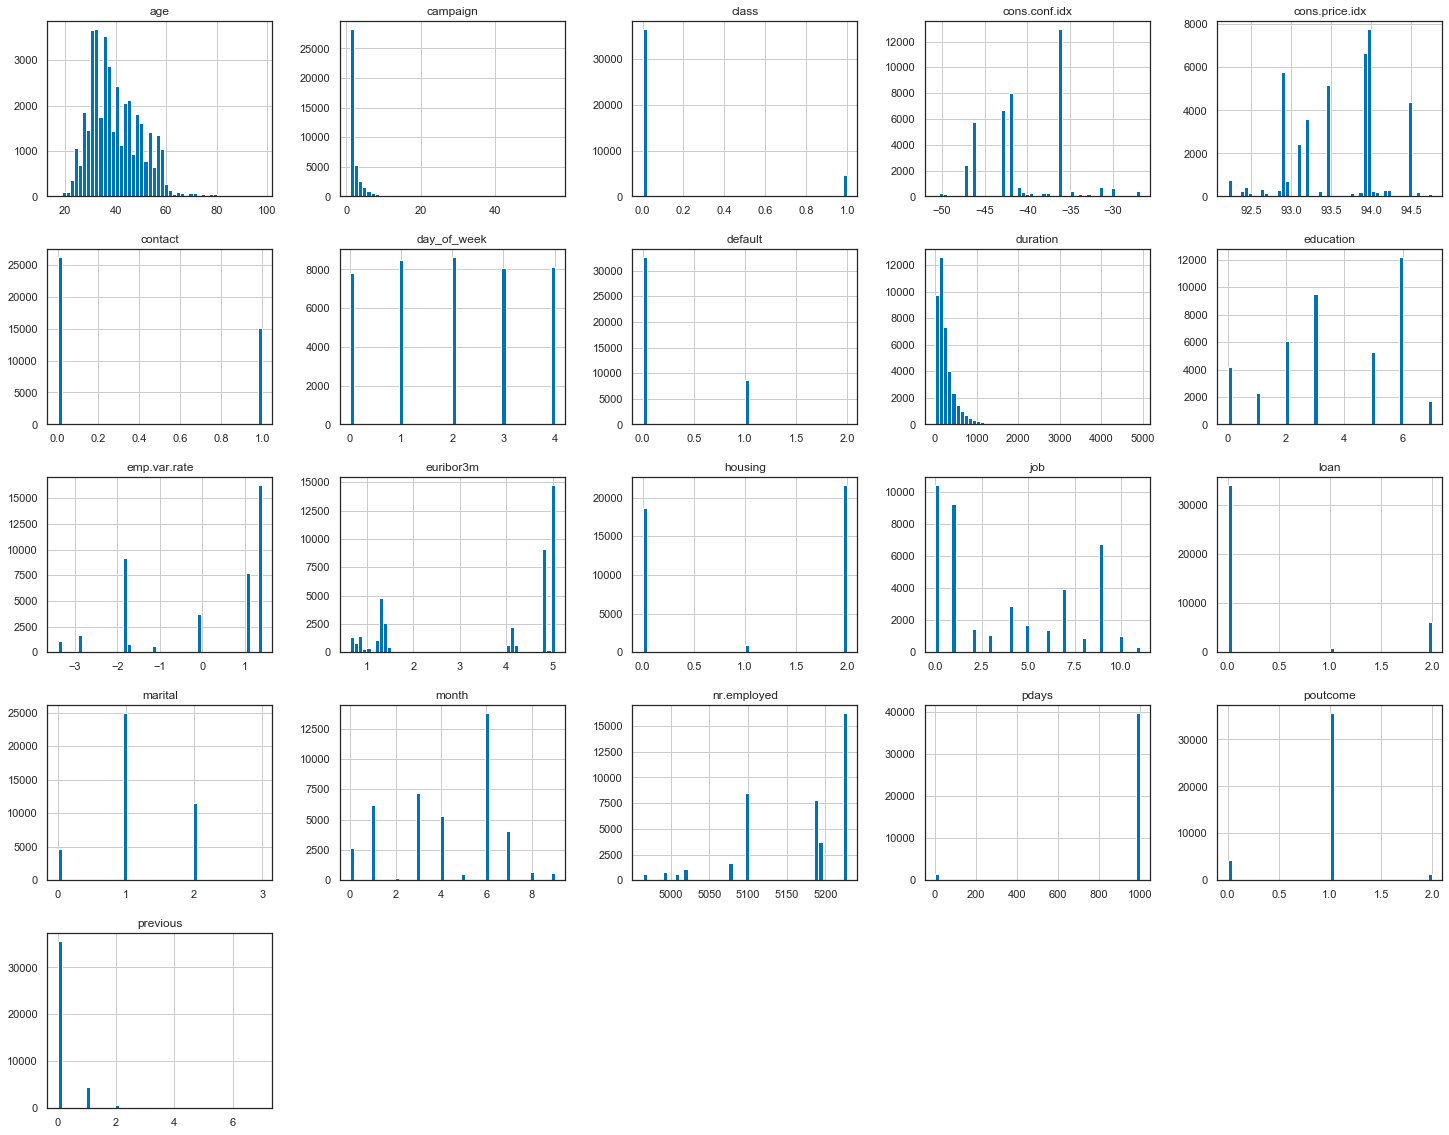

In [10]:
sns.set(color_codes=True, style="white", palette="colorblind")
axes=Direct_marketing_data.hist(bins=50,figsize=(25,20))


*Based on the above histograms we have the following observations:*
> - *Age data has normalized distribution.*
> - *Campaign and Duration columns has concentrated data towards origin*
> - *Majority of the remaining attributes do not have continuos distribution of data*

***Correlation Matrix for the dataset***

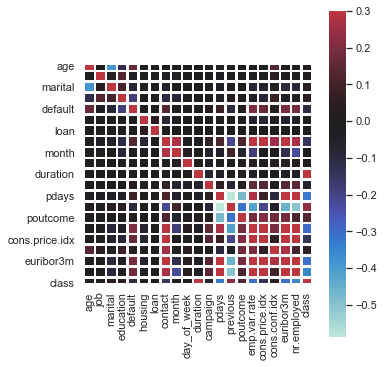

In [11]:
correlation_matrix = Direct_marketing_data.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, vmax=.3, center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": 1.5})
plt.show()

*Visualizing **Age** column distribution as a Histogram Plot*

Text(0.5, 1.0, 'Histograms of Age Variable')

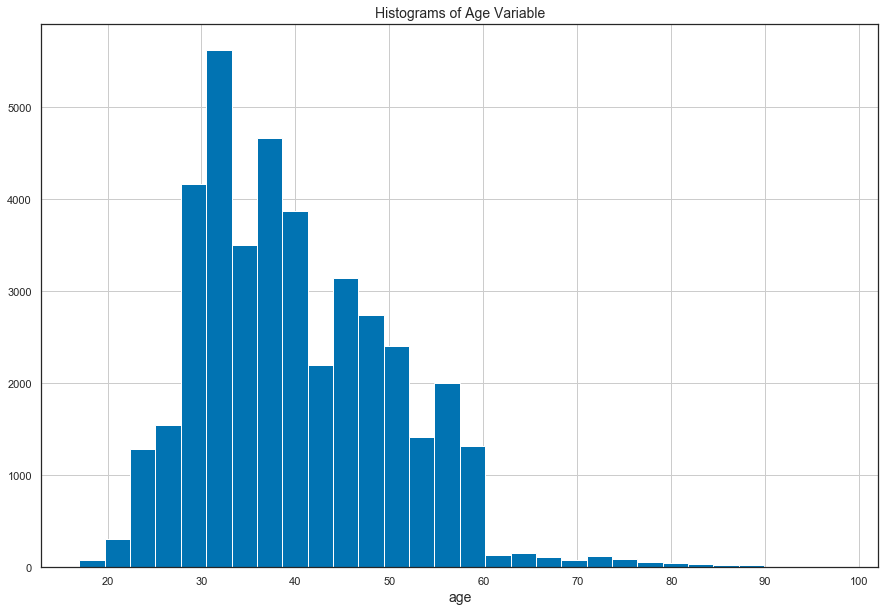

In [12]:
sns.set(color_codes=True, style="white", palette="colorblind")
axes=Direct_marketing_data['age'].hist(bins=30,figsize=(15,10))
plt.xlabel('age',fontsize=14)
plt.title('Histograms of Age Variable',fontsize=14)

*Visualizing **campaign** column distribution as a Histogram Plot*

Text(0.5, 1.0, 'Histograms of campaign Variable')

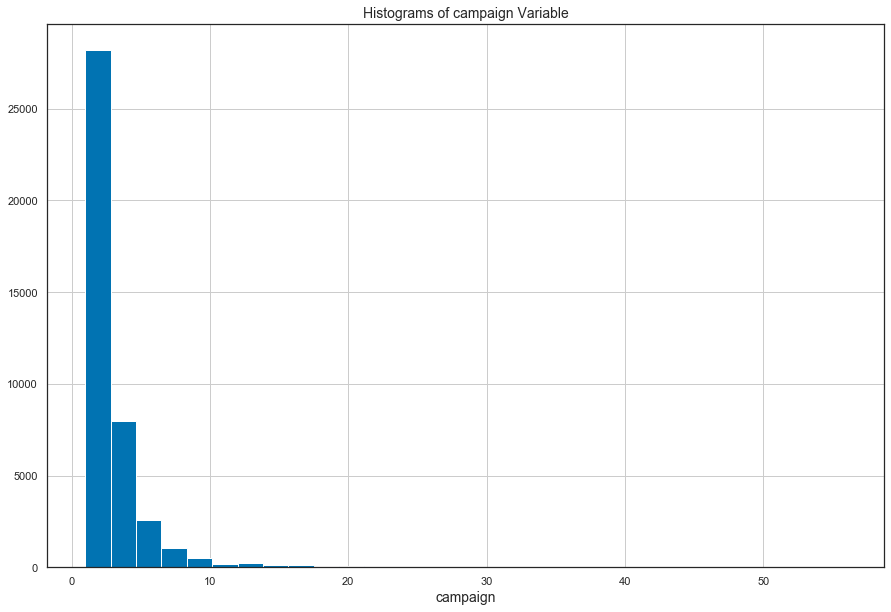

In [13]:
sns.set(color_codes=True, style="white", palette="colorblind")
axes=Direct_marketing_data['campaign'].hist(bins=30,figsize=(15,10))
plt.xlabel('campaign',fontsize=14)
plt.title('Histograms of campaign Variable',fontsize=14)

*Visualizing **duration** column distribution as a Histogram Plot*

Text(0.5, 1.0, 'Histograms of Duration Variable')

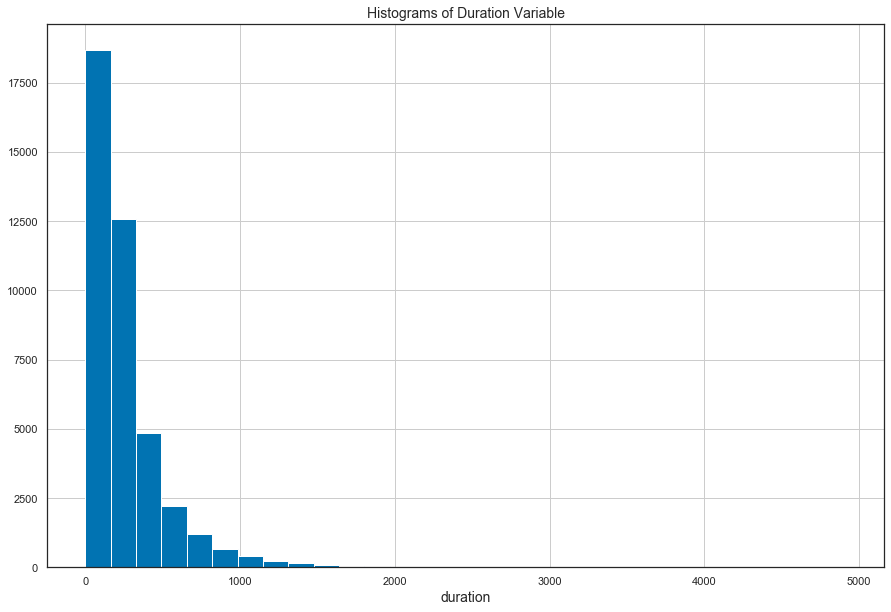

In [14]:
sns.set(color_codes=True, style="white", palette="colorblind")
axes=Direct_marketing_data['duration'].hist(bins=30,figsize=(15,10))
plt.xlabel('duration',fontsize=14)
plt.title('Histograms of Duration Variable',fontsize=14)

*Visualizing **consumer price index** column distribution as a Histogram Plot*

Text(0.5, 1.0, 'Histograms of Consumer Price Index Variable')

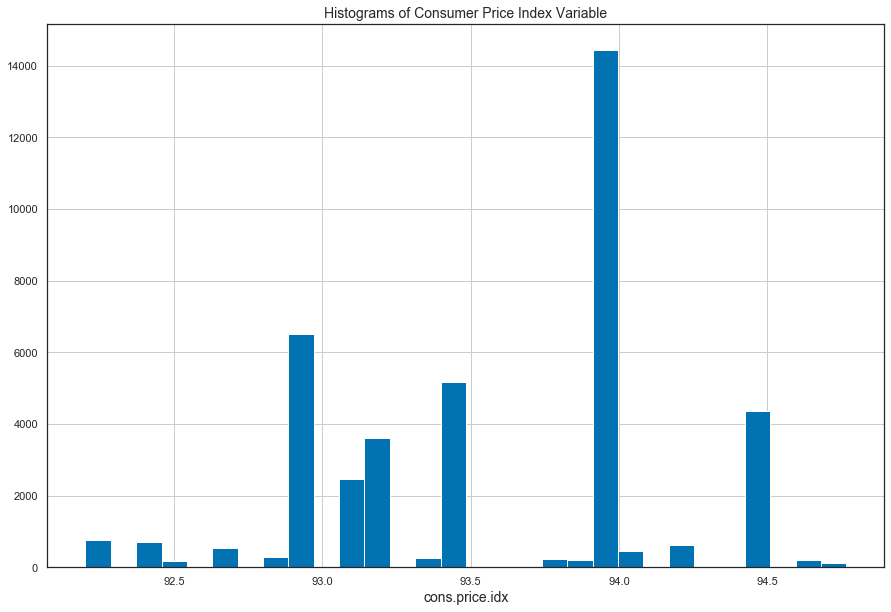

In [15]:
sns.set(color_codes=True, style="white", palette="colorblind")
axes=Direct_marketing_data['cons.price.idx'].hist(bins=30,figsize=(15,10))
plt.xlabel('cons.price.idx',fontsize=14)
plt.title('Histograms of Consumer Price Index Variable',fontsize=14)

*Visualizing **age** column distribution as a histogram with a kernel density estimate using 'distplot'*

Text(0.5, 1.0, 'Distribution of Age Variable')

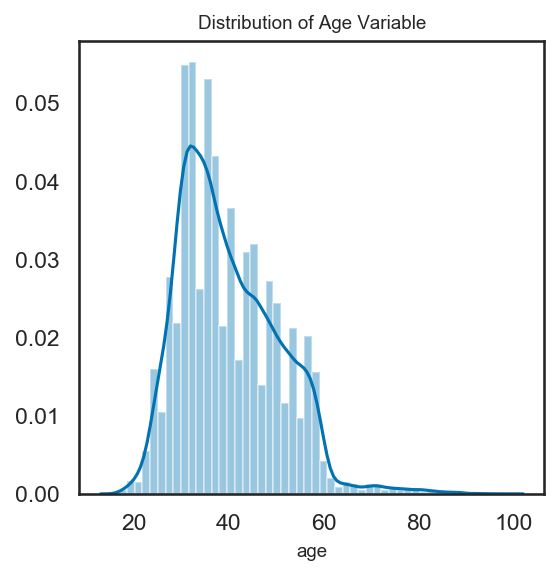

In [16]:
sns.set(color_codes=True, style="white", palette="colorblind")
graph=plt.figure(figsize=(4,4),dpi=150)
sns.distplot(Direct_marketing_data['age'].dropna(),kde=True)
plt.xlabel('age',fontsize=9)
plt.title('Distribution of Age Variable',fontsize=9)

*Visualizing **campaign** column distribution as a histogram with a kernel density estimate using 'distplot'*

Text(0.5, 1.0, 'Distribution of Campaign Variable')

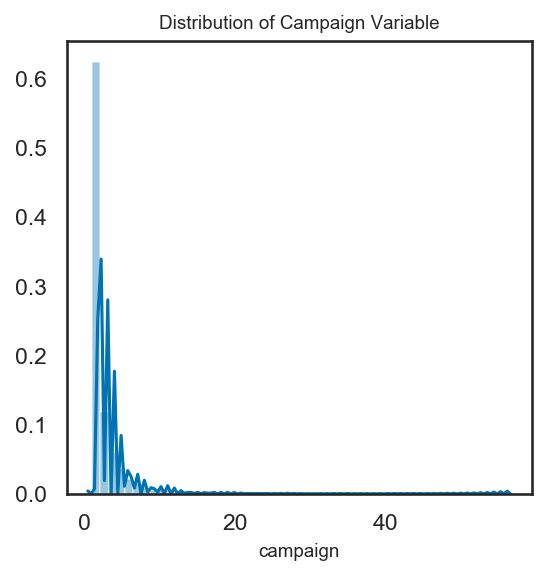

In [17]:
sns.set(color_codes=True, style="white", palette="colorblind")
graph=plt.figure(figsize=(4,4),dpi=150)
sns.distplot(Direct_marketing_data['campaign'].dropna(),kde=True)
plt.xlabel('campaign',fontsize=9)
plt.title('Distribution of Campaign Variable',fontsize=9)

*Visualizing **duration** column distribution as a histogram with a kernel density estimate using 'distplot'*

Text(0.5, 1.0, 'Distribution of Duration Variable')

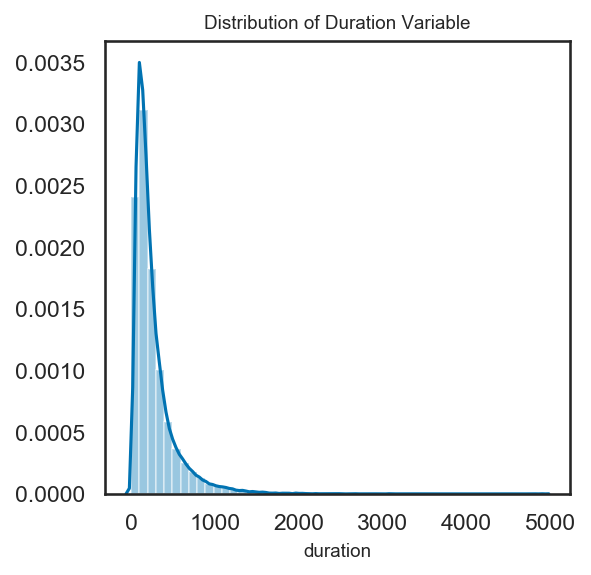

In [18]:
sns.set(color_codes=True, style="white", palette="colorblind")
graph=plt.figure(figsize=(4,4),dpi=150)
sns.distplot(Direct_marketing_data['duration'].dropna(),kde=True)
plt.xlabel('duration',fontsize=9)
plt.title('Distribution of Duration Variable',fontsize=9)

*Visualizing **consumer confidence index** column distribution as a histogram with a kernel density estimate using 'distplot'*

Text(0.5, 1.0, 'Distribution of consumer confidence index Variable')

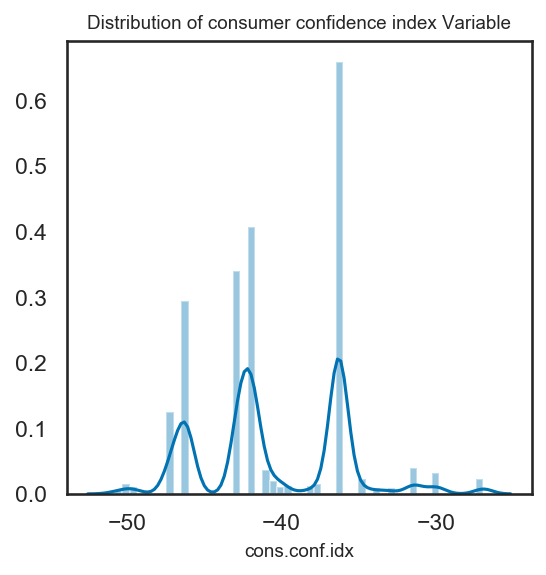

In [19]:
sns.set(color_codes=True, style="white", palette="colorblind")
graph=plt.figure(figsize=(4,4),dpi=150)
sns.distplot(Direct_marketing_data['cons.conf.idx'].dropna(),kde=True)
plt.xlabel('cons.conf.idx',fontsize=9)
plt.title('Distribution of consumer confidence index Variable',fontsize=9)

*Visualizing **consumer price index** column distribution as a histogram with a kernel density estimate using 'distplot'*

Text(0.5, 1.0, 'Distribution of consumer price index Variable')

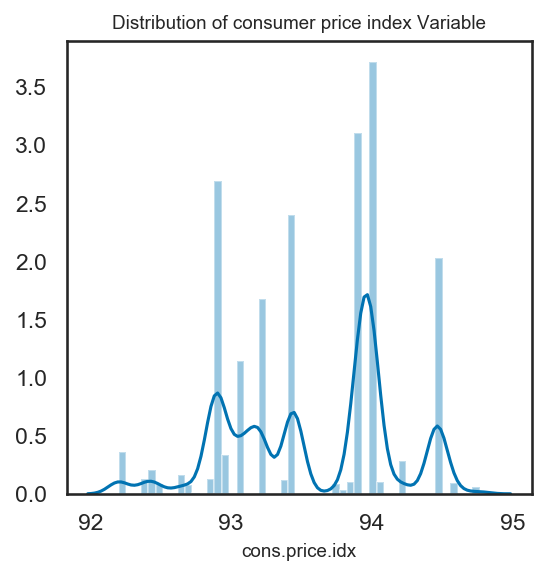

In [20]:
sns.set(color_codes=True, style="white", palette="colorblind")
graph=plt.figure(figsize=(4,4),dpi=150)
sns.distplot(Direct_marketing_data['cons.price.idx'].dropna(),kde=True)
plt.xlabel('cons.price.idx',fontsize=9)
plt.title('Distribution of consumer price index Variable',fontsize=9)

*Visualizing **Class** column to get counts of observations using countplot to check for imbalance*

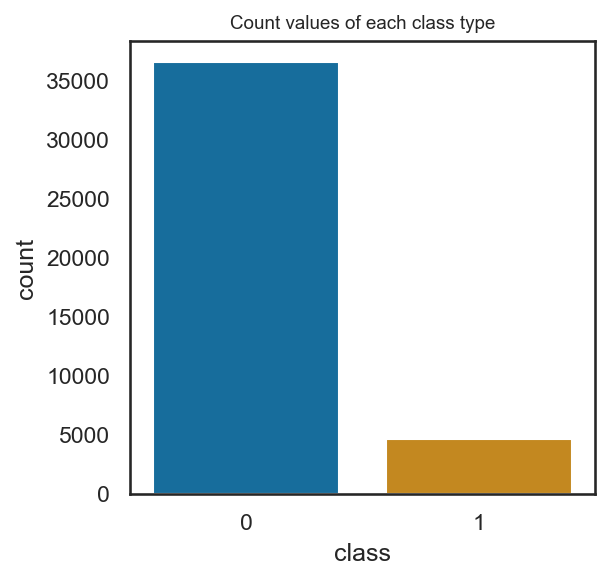

In [21]:
graph=plt.figure(figsize=(4,4),dpi=150)
plt.title('Count values of each class type',fontsize=9)
sns.countplot('class',data=Direct_marketing_data)

> *Based on the above countplot we can observe that Class 0 data is much larger than Class 1 data.*
***

*Visualizing **Class** column distribution as a scatterplot with respect to campaign and duration to check for imbalance*

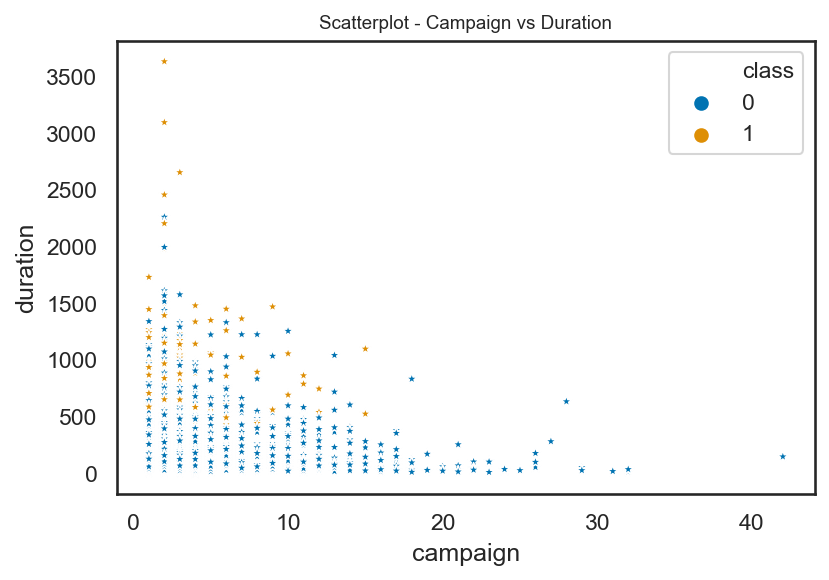

In [22]:
graph=plt.figure(dpi=150)
plt.title('Scatterplot - Campaign vs Duration',fontsize=9)
sns.scatterplot(x='campaign',y='duration',hue='class',data=Direct_marketing_data.iloc[5000:10000],marker='*')

### Model Creations using Imbalanced Data


*Splitting the data into train-test split*

In [23]:
X1 = Direct_marketing_data.drop(['class'],axis=1).values
Y1 = Direct_marketing_data['class'].values
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.25,random_state=25)

***
> **Logistic Regression for Imbalanced Data**

In [24]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[26768   676]
 [ 2115  1332]]

Testing Confusion matrix:
 [[8876  228]
 [ 740  453]]

Recall Score:		0.3797150041911148
Precision Score:	0.6651982378854625
F1 Score:		0.4834578441835646
Accuracy:		0.90599203651549


C:\Users\sriva\Miniconda3\envs\cpsc6820\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


***
> **DecisionTree for Imbalanced Data**

In [25]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[27444     0]
 [    0  3447]]

Testing Confusion matrix:
 [[8515  589]
 [ 571  622]]

Recall Score:		0.5213746856663872
Precision Score:	0.5136251032204789
F1 Score:		0.5174708818635607
Accuracy:		0.8873458288821987


***
> **K-Neighbors Neighbour for Imbalanced Data**

In [26]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[26714   730]
 [ 1354  2093]]

Testing Confusion matrix:
 [[8742  362]
 [ 643  550]]

Recall Score:		0.46102263202011734
Precision Score:	0.6030701754385965
F1 Score:		0.5225653206650832
Accuracy:		0.9023987569194911


***
> **Random Forest for Imbalanced Data**

In [27]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[27420    24]
 [  172  3275]]

Testing Confusion matrix:
 [[8832  272]
 [ 699  494]]

Recall Score:		0.41408214585079633
Precision Score:	0.6449086161879896
F1 Score:		0.5043389484430832
Accuracy:		0.9057006895212197


***

#### *Finding the total number of observations in each 'class' (output variable) labels to do sampling*

In [28]:
counts = Counter(Direct_marketing_data['class'])
print(f"Number of class 0 : {counts[0]}\nNumber of class 1 : {counts[1]}\n")

Number of class 0 : 36548
Number of class 1 : 4640



***
*As we can see from the above output that class has great **imbalance** between the count of positive values(Customer Subscribed) and negative values(Customer not Subscribed).*<br>
*Inorder to get more accurate results, we need to address the imbalance of data.*<br>


<em>Two key techniques of sampling that can be used to address the imbalance of data are as follows:</em>
> - ***Under-Sampling :***<em> To delete examples from the majority class</em>
> - ***Over-Sampling :*** <em> To duplicate examples from the minority class</em>
***

### Applying Under - Sampling

- *Shuffling the dataset*

In [29]:
Direct_marketing_data_shuffled=Direct_marketing_data.sample(frac=1)
Direct_marketing_data_shuffled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
27011,54,5,0,6,0,0,2,0,7,0,...,6,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
25263,31,0,1,3,0,0,0,0,7,3,...,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
7218,37,7,1,3,0,2,0,1,6,2,...,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0,0
39445,49,0,1,6,0,2,2,0,0,3,...,2,999,3,0,-1.8,93.749,-34.6,0.644,5008.7,1
34651,48,7,0,2,0,1,1,0,6,2,...,7,999,0,1,-1.8,92.893,-46.2,1.266,5099.1,0


- *Collecting all 'Class 1' data*

In [30]:
fdata=Direct_marketing_data_shuffled.loc[Direct_marketing_data_shuffled['class']==1]
print(f"Shape of this data is :\t{fdata.shape}\n")
fdata

Shape of this data is :	(4640, 21)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
39445,49,0,1,6,0,2,2,0,0,3,...,2,999,3,0,-1.8,93.749,-34.6,0.644,5008.7,1
29452,59,6,1,5,0,2,0,0,0,1,...,1,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,1
38744,72,5,0,1,0,2,0,0,7,4,...,1,999,0,1,-3.4,92.649,-30.1,0.715,5017.5,1
37752,34,10,2,5,0,0,0,0,1,0,...,2,2,1,2,-2.9,92.201,-31.4,0.849,5076.2,1
40355,40,0,1,3,0,0,2,0,1,3,...,2,999,0,1,-1.7,94.027,-38.3,0.899,4991.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,42,4,1,6,0,0,0,1,6,3,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
37860,26,8,2,3,0,2,0,0,1,0,...,2,6,2,0,-2.9,92.201,-31.4,0.825,5076.2,1
39148,31,0,0,5,0,2,0,0,5,3,...,2,999,1,0,-1.8,93.369,-34.8,0.655,5008.7,1
13457,39,1,1,1,1,2,0,0,3,4,...,6,999,0,1,1.4,93.918,-42.7,4.962,5228.1,1


- *Collecting same number of 'Class 0' data*

In [31]:
nfdata= Direct_marketing_data_shuffled.loc[Direct_marketing_data_shuffled['class']==0].sample(n=4640,random_state=464)
print(f"Shape of this data is :\t{nfdata.shape}\n")
nfdata


Shape of this data is :	(4640, 21)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
9764,54,5,1,6,1,0,0,1,4,1,...,3,999,0,1,1.4,94.465,-41.8,4.961,5228.1,0
5844,48,0,1,6,0,0,0,1,6,1,...,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
23722,59,0,1,3,1,2,0,0,1,2,...,2,999,0,1,1.4,93.444,-36.1,4.962,5228.1,0
7232,31,9,1,5,0,0,0,1,6,2,...,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0,0
2780,42,1,0,1,1,0,0,1,6,4,...,1,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25271,31,9,2,6,0,0,0,0,7,3,...,2,999,1,0,-0.1,93.200,-42.0,4.153,5195.8,0
12013,29,1,1,2,0,0,2,1,4,2,...,1,999,0,1,1.4,94.465,-41.8,4.955,5228.1,0
17275,31,7,1,3,0,0,2,0,3,0,...,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
29656,31,0,2,6,0,2,0,0,0,1,...,1,999,1,0,-1.8,93.075,-47.1,1.405,5099.1,0


- **Performing the Under-Sampling**


In [32]:
rus = RandomUnderSampler()
undersampled_attributes,undersampled_labels = rus.fit_resample(Direct_marketing_data_shuffled.drop(['class'],axis=1), Direct_marketing_data_shuffled['class'])

***Displaying under sampled data***

In [33]:
undersampled_attributes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,51,1,1,0,1,2,2,1,6,3,180,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,44,2,1,0,0,1,1,0,6,3,241,1,999,1,0,-1.8,92.893,-46.2,1.344,5099.1
2,32,7,1,3,0,2,0,0,7,3,105,1,999,1,0,-0.1,93.200,-42.0,4.153,5195.8
3,47,1,1,3,1,0,0,1,6,3,269,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,60,2,1,0,0,0,0,1,4,2,43,3,999,0,1,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,42,4,1,6,0,0,0,1,6,3,1677,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
9276,26,8,2,3,0,2,0,0,1,0,155,2,6,2,0,-2.9,92.201,-31.4,0.825,5076.2
9277,31,0,0,5,0,2,0,0,5,3,292,2,999,1,0,-1.8,93.369,-34.8,0.655,5008.7
9278,39,1,1,1,1,2,0,0,3,4,1439,6,999,0,1,1.4,93.918,-42.7,4.962,5228.1


In [34]:
undersampled_labels

0       0
1       0
2       0
3       0
4       0
       ..
9275    1
9276    1
9277    1
9278    1
9279    1
Name: class, Length: 9280, dtype: int32

- *Joining the two results column-wise into a single dataframe*

In [35]:
undersampled=pd.concat([pd.DataFrame(undersampled_attributes),pd.DataFrame(undersampled_labels)],axis=1)
undersampled.columns=Direct_marketing_data.columns
print(f"The shape of the undersampled data :\t{undersampled.shape}\n")
undersampled

The shape of the undersampled data :	(9280, 21)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,51,1,1,0,1,2,2,1,6,3,...,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,44,2,1,0,0,1,1,0,6,3,...,1,999,1,0,-1.8,92.893,-46.2,1.344,5099.1,0
2,32,7,1,3,0,2,0,0,7,3,...,1,999,1,0,-0.1,93.200,-42.0,4.153,5195.8,0
3,47,1,1,3,1,0,0,1,6,3,...,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,60,2,1,0,0,0,0,1,4,2,...,3,999,0,1,1.4,94.465,-41.8,4.961,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,42,4,1,6,0,0,0,1,6,3,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
9276,26,8,2,3,0,2,0,0,1,0,...,2,6,2,0,-2.9,92.201,-31.4,0.825,5076.2,1
9277,31,0,0,5,0,2,0,0,5,3,...,2,999,1,0,-1.8,93.369,-34.8,0.655,5008.7,1
9278,39,1,1,1,1,2,0,0,3,4,...,6,999,0,1,1.4,93.918,-42.7,4.962,5228.1,1


***
### Visualizing Data after Under - Sampling

- *countplot() to check the number of instances of both the classes*

Text(0.5, 1.0, 'Count Histogram of each label')

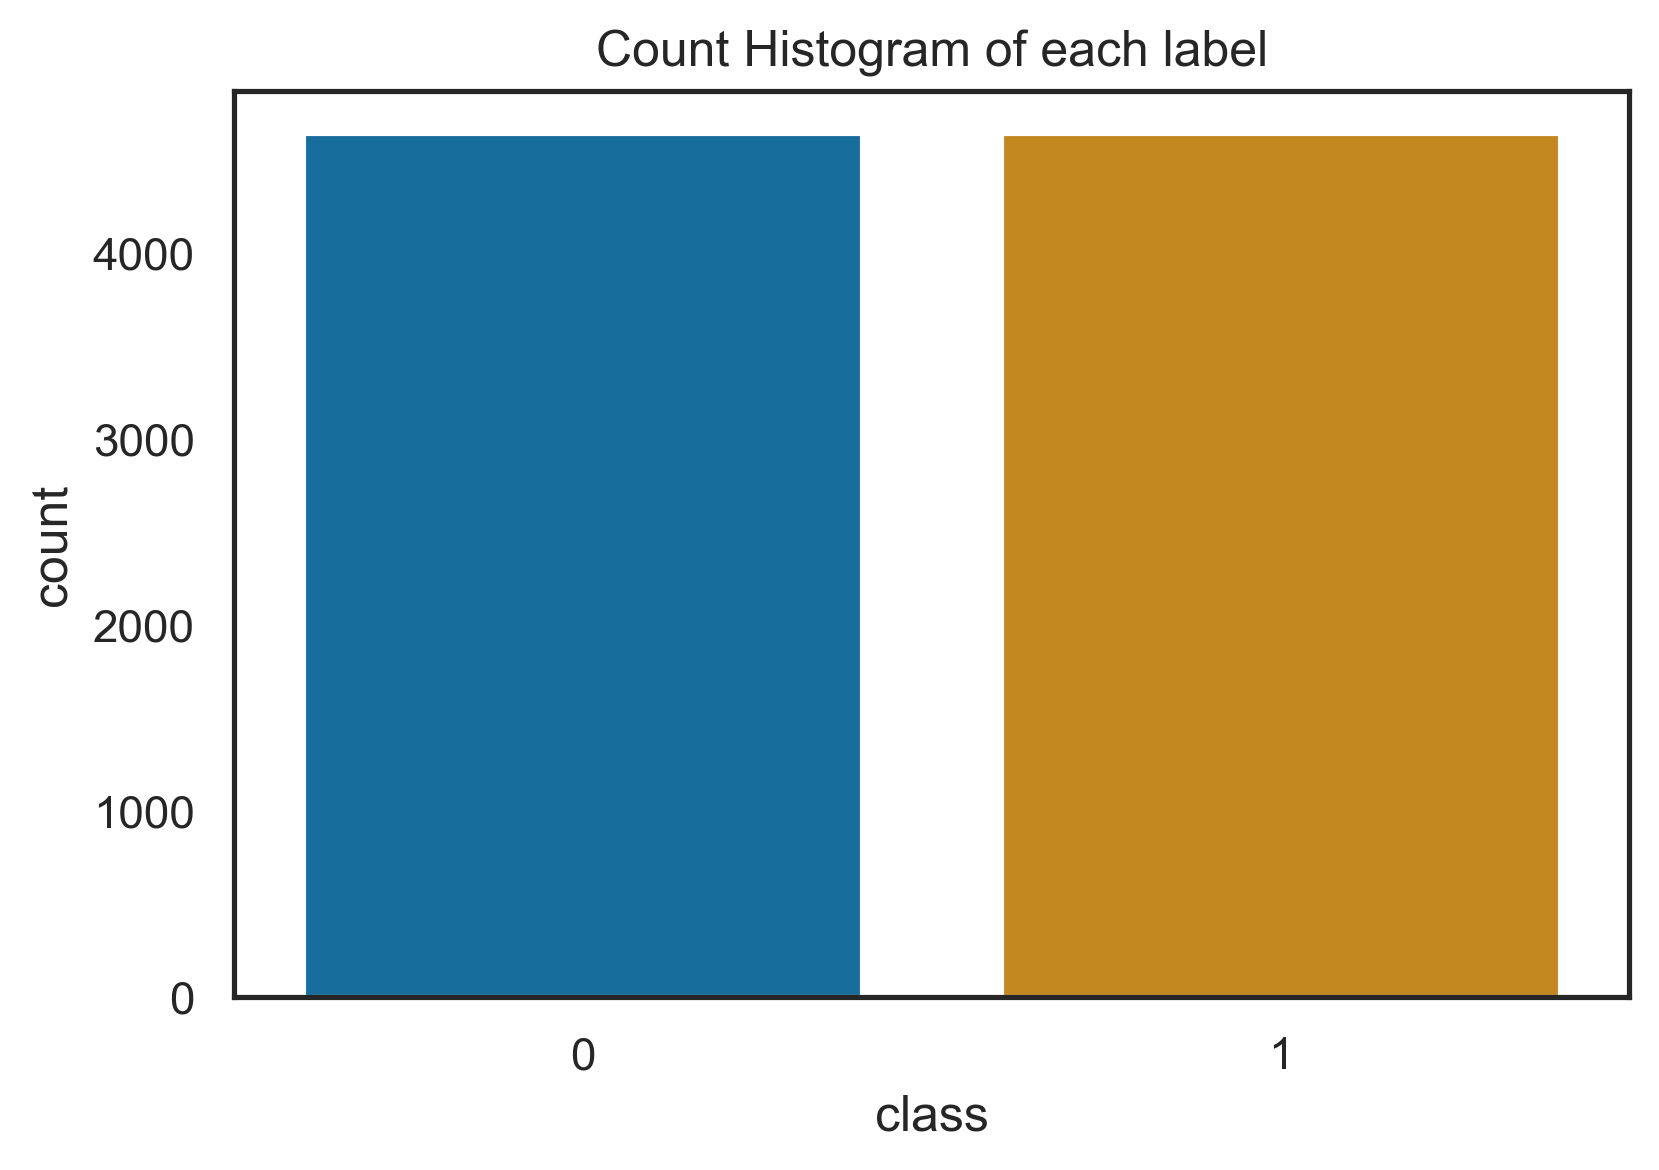

In [36]:
graph=plt.figure(dpi=300)
sns.countplot('class',data=undersampled)
plt.title('Count Histogram of each label')

- *scatterplot() for visualizing amount distribution with respect to campaign and duration*

Text(0.5, 1.0, 'Scatterplot (Under-Sampled) - Campaign vs Duration')

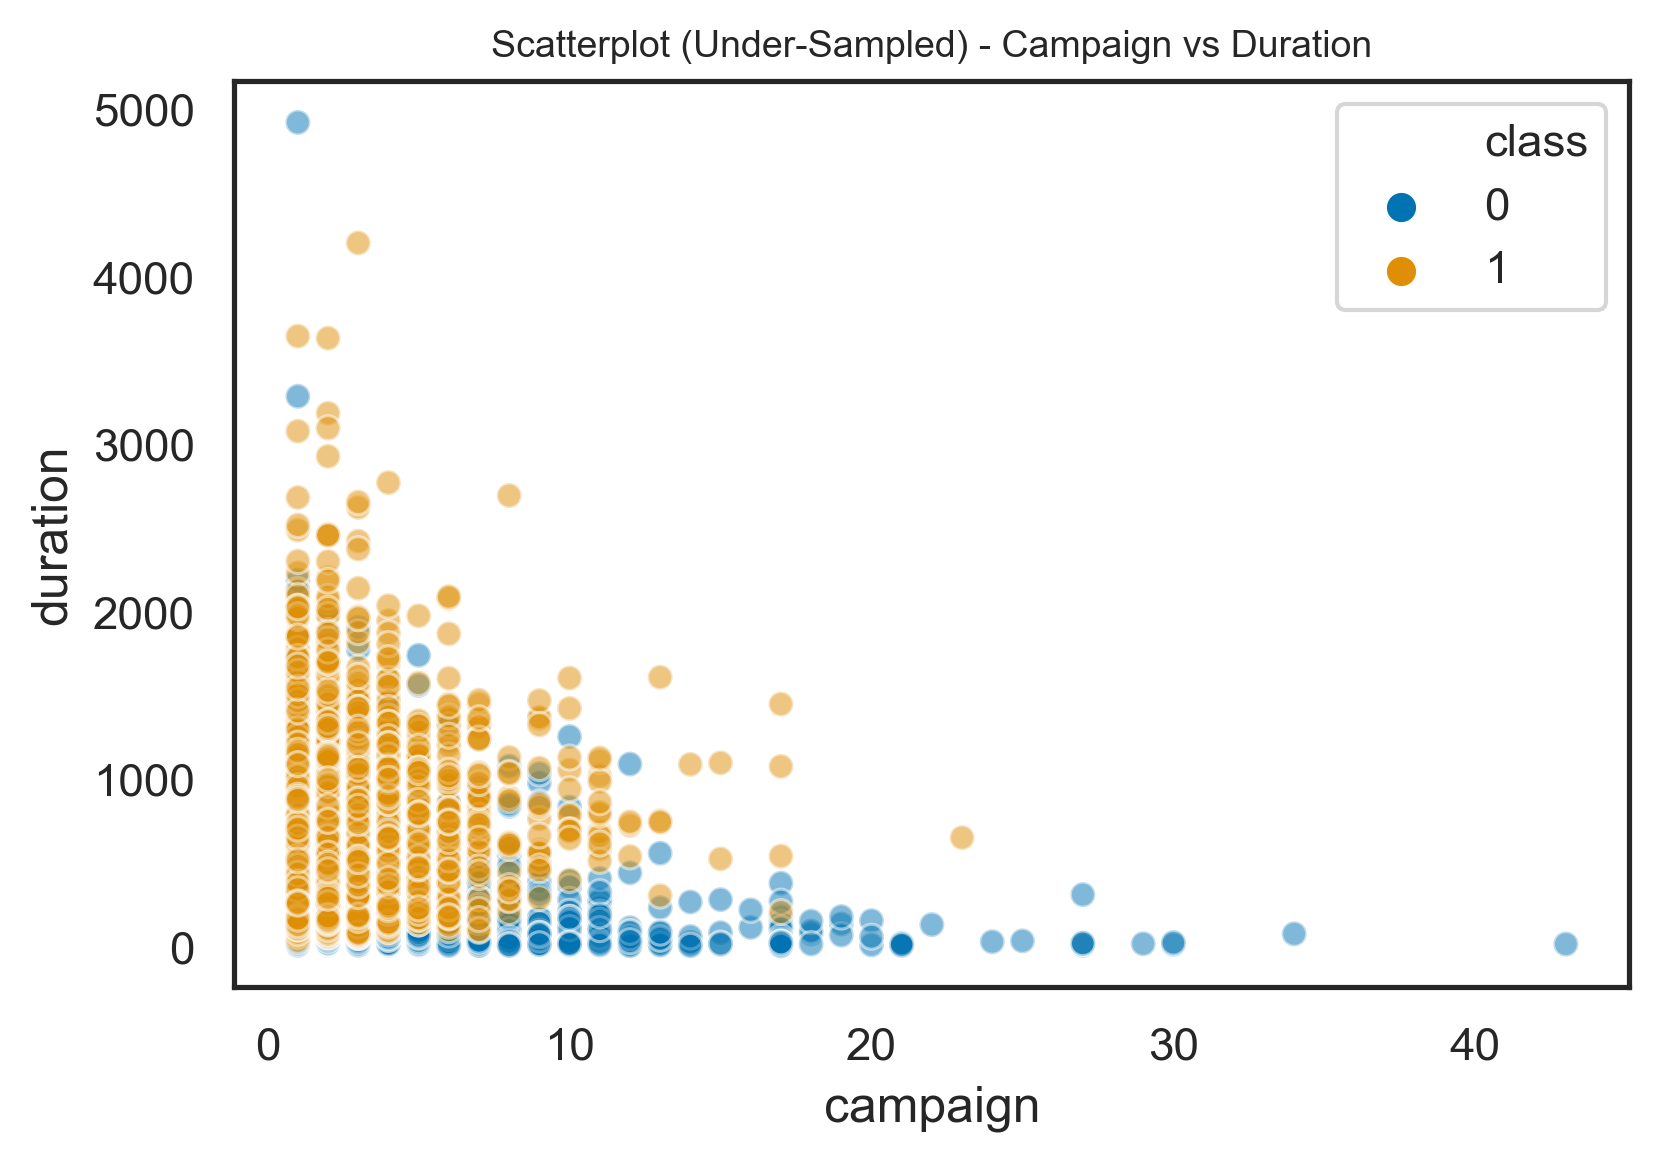

In [37]:
graph=plt.figure(dpi=300)
sns.scatterplot(x='campaign',y='duration',hue='class',data = undersampled,alpha=0.5)
plt.title('Scatterplot (Under-Sampled) - Campaign vs Duration',fontsize=9)

> <em>Under-Sampling Technique reduces the row to 9280 rows i.e 4640 rows of each <b>Class.</b></em><br>
***

### Model Creations using Under-Sampled Data

*Splitting the data into train-test split*

In [38]:
X2 = undersampled.drop(['class'],axis=1).values
Y2 = undersampled['class'].values
x_train,x_test,y_train,y_test = train_test_split(X2,Y2,test_size=0.25,random_state=25)

***
> **Logistic Regression**

In [39]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[2945  532]
 [ 500 2983]]

Testing Confusion matrix:
 [[ 967  196]
 [ 153 1004]]

Recall Score:		0.867761452031115
Precision Score:	0.8366666666666667
F1 Score:		0.8519304200254562
Accuracy:		0.8495689655172414


C:\Users\sriva\Miniconda3\envs\cpsc6820\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


***
> **DecisionTree**

In [40]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[3477    0]
 [   0 3483]]

Testing Confusion matrix:
 [[951 212]
 [226 931]]

Recall Score:		0.8046672428694901
Precision Score:	0.8145231846019247
F1 Score:		0.8095652173913044
Accuracy:		0.8112068965517242


***
>**K-Neighbors Neighbour**

In [41]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[3013  464]
 [ 279 3204]]

Testing Confusion matrix:
 [[ 938  225]
 [ 136 1021]]

Recall Score:		0.8824546240276577
Precision Score:	0.819422150882825
F1 Score:		0.8497711194340407
Accuracy:		0.844396551724138


***
>**Random Forest**

In [42]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[3456   21]
 [  25 3458]]

Testing Confusion matrix:
 [[ 969  194]
 [ 126 1031]]

Recall Score:		0.8910976663785652
Precision Score:	0.8416326530612245
F1 Score:		0.8656591099916037
Accuracy:		0.8620689655172413


***
### Applying Over-Sampling using SMOTE

- *Performing the Over-Sampling*

In [43]:
sm= SMOTE()
oversampled_attributes,oversampled_labels=sm.fit_resample(Direct_marketing_data.drop(['class'],axis=1),Direct_marketing_data['class'])

In [44]:
oversampled_attributes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,32,2,1,3,0,0,0,1,6,4,857,1,999,0,1,1.1,93.994000,-36.400000,4.858835,5191.0
73092,30,0,1,2,0,1,0,0,5,1,984,3,999,0,0,-1.8,92.916736,-46.317374,1.337172,5099.1
73093,52,1,1,3,0,1,0,1,6,1,615,2,999,0,1,1.1,93.994000,-36.400000,4.857382,5191.0
73094,23,8,2,6,0,0,0,0,4,0,200,1,999,1,0,-1.8,92.947581,-46.469906,1.302785,5099.1


In [45]:
oversampled_labels

0        0
1        0
2        0
3        0
4        0
        ..
73091    1
73092    1
73093    1
73094    1
73095    1
Name: class, Length: 73096, dtype: int32

- *Joining the two results column-wise into a single dataframe*

In [46]:
oversampled=pd.concat([pd.DataFrame(oversampled_attributes),pd.DataFrame(oversampled_labels)],axis=1)
oversampled.columns=Direct_marketing_data.columns
oversampled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,32,2,1,3,0,0,0,1,6,4,...,1,999,0,1,1.1,93.994000,-36.400000,4.858835,5191.0,1
73092,30,0,1,2,0,1,0,0,5,1,...,3,999,0,0,-1.8,92.916736,-46.317374,1.337172,5099.1,1
73093,52,1,1,3,0,1,0,1,6,1,...,2,999,0,1,1.1,93.994000,-36.400000,4.857382,5191.0,1
73094,23,8,2,6,0,0,0,0,4,0,...,1,999,1,0,-1.8,92.947581,-46.469906,1.302785,5099.1,1


***
### Visualizing Data after Over-Sampling

- *countplot() to check the number of instances of both the classes*

Text(0.5, 1.0, 'Count Histogram of each label')

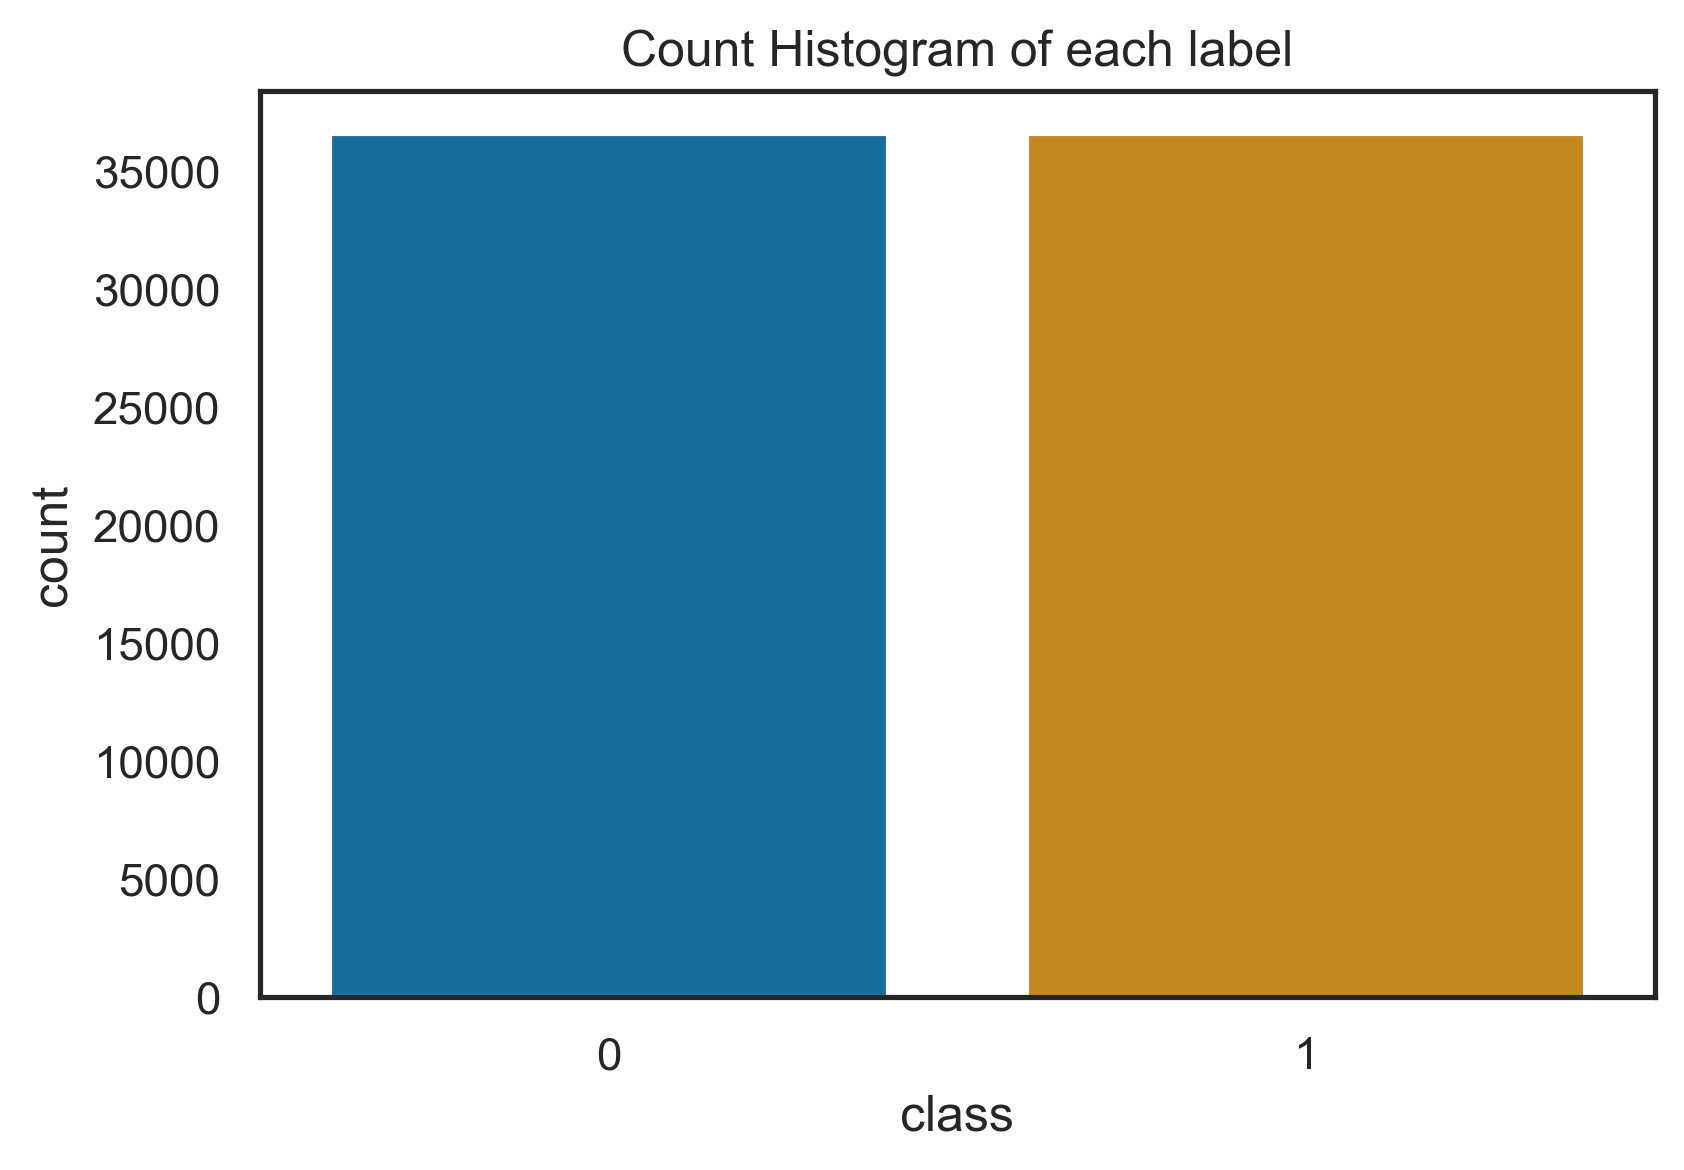

In [47]:
graph=plt.figure(dpi=300)
sns.countplot('class',data=oversampled)
plt.title('Count Histogram of each label')

- *scatterplot() for visualizing amount distribution with respect to time*

Text(0.5, 1.0, 'Scatterplot (Over-Sampled) - Campaign vs Duration')

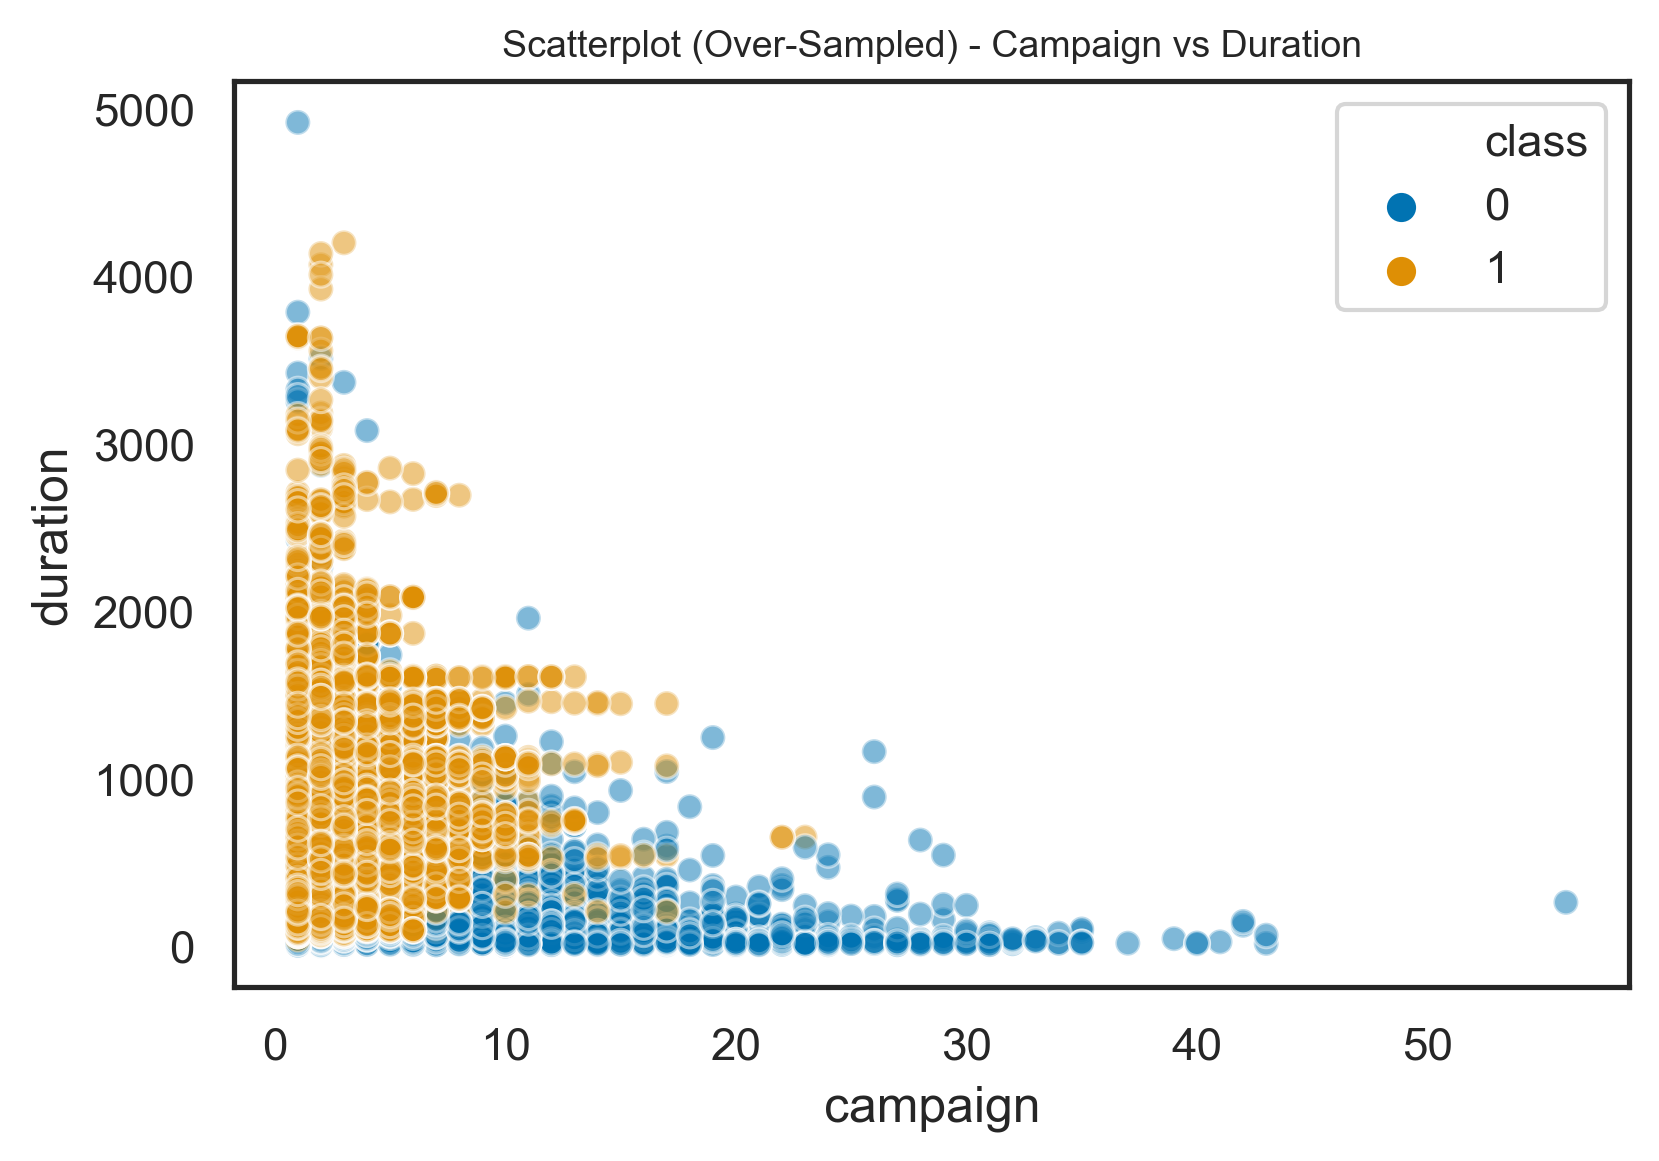

In [48]:
graph=plt.figure(dpi=300)
sns.scatterplot(x='campaign',y='duration',hue='class',data = oversampled,alpha=0.5)
plt.title('Scatterplot (Over-Sampled) - Campaign vs Duration',fontsize=9)

> <em>Over-Sampling Technique increases the rows to 73096 rows i.e 36548 rows of each <b>Class.</b></em><br>

***
### Model Creations using Over-Sampled Data

*Splitting the data into train-test split*

In [49]:
X3 = oversampled.drop(['class'],axis=1).values
Y3 = oversampled['class'].values
x_train,x_test,y_train,y_test = train_test_split(X3,Y3,test_size=0.25,random_state=25)

***
> **Logistic Regression**

In [50]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[23934  3501]
 [ 2929 24458]]

Testing Confusion matrix:
 [[7960 1153]
 [1045 8116]]

Recall Score:		0.8859294836808209
Precision Score:	0.8756068615816162
F1 Score:		0.880737927292458
Accuracy:		0.8797198205100142


C:\Users\sriva\Miniconda3\envs\cpsc6820\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


***
> **DecisionTree**

In [52]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[27435     0]
 [    0 27387]]

Testing Confusion matrix:
 [[8373  740]
 [ 555 8606]]

Recall Score:		0.9394170942036896
Precision Score:	0.9208217419216778
F1 Score:		0.9300264764683633
Accuracy:		0.9291342891539893


***
>**K-Neighbors Neighbour**

In [53]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[24293  3142]
 [  175 27212]]

Testing Confusion matrix:
 [[7794 1319]
 [ 110 9051]]

Recall Score:		0.9879925772295601
Precision Score:	0.8728061716489874
F1 Score:		0.9268342634785725
Accuracy:		0.9218014665645179


***
>**Random Forest**

In [51]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[27397    38]
 [   64 27323]]

Testing Confusion matrix:
 [[8602  511]
 [ 471 8690]]

Recall Score:		0.9485863988647527
Precision Score:	0.9444625584175633
F1 Score:		0.9465199869295284
Accuracy:		0.9462624493816351
